In [1]:
import pandas as pd
import pyspark
import pyspark.sql.functions as F
import pyspark.sql.types as T
import seaborn as sns

spark = pyspark.sql.SparkSession.builder.getOrCreate()
# sc = pyspark.SparkContext()

pd.set_option('display.max_columns', 500)

In [2]:
df = spark.read.csv('fews-data/2017_StPaul_MN_Real_Estate.csv', header=True, inferSchema=True)
dfPd = df.toPandas()
dfPd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 74 columns):
No.                      5000 non-null int32
MLSID                    5000 non-null object
StreetNumberNumeric      5000 non-null int32
streetaddress            5000 non-null object
STREETNAME               5000 non-null object
PostalCode               5000 non-null int32
StateOrProvince          5000 non-null object
City                     5000 non-null object
SalesClosePrice          5000 non-null int32
LISTDATE                 5000 non-null object
LISTPRICE                5000 non-null int32
LISTTYPE                 5000 non-null object
OriginalListPrice        5000 non-null int32
PricePerTSFT             5000 non-null float64
FOUNDATIONSIZE           5000 non-null int32
FENCE                    2972 non-null object
MapLetter                5000 non-null object
LotSizeDimensions        5000 non-null object
SchoolDistrictNumber     5000 non-null object
DAYSONMARKET             

In [3]:
dfPd.head(2)

,No.,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0.0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2.0,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0


In [4]:
df = df.withColumnRenamed('No.', 'No')
df.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0


In [5]:
df.describe(['LISTPRICE']).show()

+-------+------------------+
|summary|         LISTPRICE|
+-------+------------------+
|  count|              5000|
|   mean|        263419.365|
| stddev|143944.10818036905|
|    min|             40000|
|    max|           1850000|
+-------+------------------+



In [6]:
df.agg({'SalesClosePrice': 'mean'}).collect()

[Row(avg(SalesClosePrice)=262804.4668)]

In [7]:
df.cov('SalesClosePrice','YEARBUILT')

1281910.3840634783

In [8]:
df.sample(False, 0.005, 42).count()

29

/home/anonymous/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


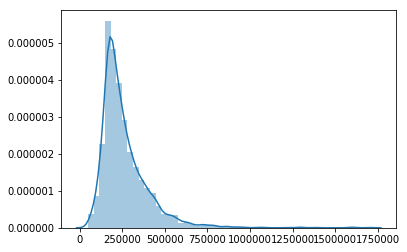

In [9]:
sampleDf = df.select('SalesClosePrice').sample(False, 0.5, 42).toPandas()
sns.distplot(sampleDf)

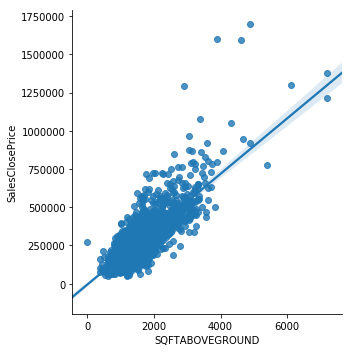

In [10]:
sDf = df.select(['SalesClosePrice','SQFTABOVEGROUND']).sample(False, 0.5, 42).toPandas()
sns.lmplot(x='SQFTABOVEGROUND', y='SalesClosePrice', data=sDf)

In [11]:
colsToDrop = ['No.', 'UNITNUMBER', 'CLASS']
df2 = df.drop(*colsToDrop)

print('# of columns:', len(df2.columns))

# of columns: 72


In [12]:
df2 = df.where(~df['PotentialShortSale'].like('Not Disclosed'))

print('# of records:', df2.count())

# of records: 4989


In [13]:
stdVal = df.agg({'SalesClosePrice': 'stddev'}).collect()[0][0]
meanVal = df.agg({'SalesClosePrice': 'mean'}).collect()[0][0]

print('Mean: {0}; Standard deviation: {1}'.format(meanVal, stdVal))

Mean: 262804.4668; Standard deviation: 140559.82591998563


In [14]:
hiBound = meanVal + (3 * stdVal)
lowBound = meanVal - (3 * stdVal)

print('Lower bound: {0}; Upper bound: {1}'.format(lowBound, hiBound))

Lower bound: -158875.01095995685; Upper bound: 684483.9445599569


In [15]:
df2 = df.where((df['LISTPRICE'] < hiBound) & (df['LISTPRICE'] > lowBound))
print('# of records: {0}'.format(df2.count()))

# of records: 4916


In [16]:
df2.limit(1).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0


# 2. Dropping data

In [17]:
df.dropna().count()

0

In [18]:
df.dropna(how='all', subset=['LISTPRICE','SalesClosePrice']).count()

5000

In [19]:
df.dropna(thresh=2).count()

5000

In [20]:
df.dropDuplicates().count()

5000

In [21]:
df.dropDuplicates(['streetaddress']).count()

4985

# 2.1. Adjusting data

In [22]:
maxDay = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
minDay = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

print('Minday: {0}; Maxday: {1}'.format(minDay, maxDay))

Minday: 0; Maxday: 225


In [23]:
test = df.withColumn('scaledDays', (df['DAYSONMARKET']-minDay) / (maxDay-minDay))
test[['scaledDays']].limit(2).toPandas()

,scaledDays
0,0.044444
1,0.017778


In [24]:
meanDay = df.agg({'DAYSONMARKET': 'mean'}).collect()[0][0]
stdDay = df.agg({'DAYSONMARKET': 'stddev'}).collect()[0][0]

print('Mean: {0}; Standard deviation: {1}'.format(meanDay, stdDay))

Mean: 28.3584; Standard deviation: 28.708702293163125


In [25]:
test = df.withColumn('ztransDay', (df['DAYSONMARKET']-meanDay) / stdDay)
test.agg({'ztransDay':'mean'}).collect()

[Row(avg(ztransDay)=-3.6568525985103407e-16)]

In [26]:
test.agg({'ztransDay':'stddev'}).collect()

[Row(stddev(ztransDay)=1.0000000000000009)]

In [27]:
test = df.withColumn('logSalesClosePrice', F.log(df['SalesClosePrice']))
test.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,logSalesClosePrice
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,11.870600
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,12.154779


In [28]:
df.where(df['ROOF'].isNull()).count()

765

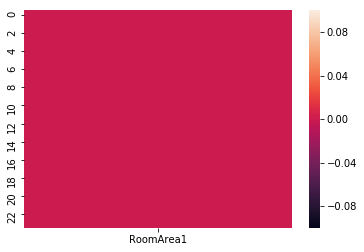

In [29]:
test = df.select(['RoomArea1']).sample(False, .005, 4).toPandas()
sns.heatmap(data=test.isnull())

In [30]:
# Replacing missing values with 0
df.fillna(0, subset=['DAYSONMARKET']).first()

Row(No=1, MLSID='RMLS', StreetNumberNumeric=11511, streetaddress='11511 Stillwater Blvd N', STREETNAME='Stillwater', PostalCode=55042, StateOrProvince='MN', City='LELM - Lake Elmo', SalesClosePrice=143000, LISTDATE='7/15/2017 0:00', LISTPRICE=139900, LISTTYPE='Exclusive Right', OriginalListPrice=139900, PricePerTSFT=145.9184, FOUNDATIONSIZE=980, FENCE='Other', MapLetter='C4', LotSizeDimensions='279X200', SchoolDistrictNumber='834 - Stillwater', DAYSONMARKET=10, offmarketdate='7/30/2017 0:00', Fireplaces=0, RoomArea4='12 x  9', roomtype='Living Room, Dining Room, Family Room, Kitchen, First (1st) Bedroom, Second (2nd) Bedroom, Third (3rd) Bedroom, Fourth (4th) Bedroom, Deck', ROOF=None, RoomFloor4='Main', PotentialShortSale='No', PoolDescription=None, PDOM=10, GarageDescription='Attached Garage', SQFTABOVEGROUND=980, Taxes=1858, RoomFloor1='Main', RoomArea1='16 x 13', TAXWITHASSESSMENTS=1858.0, TAXYEAR=2017, LivingArea=980, UNITNUMBER=None, YEARBUILT=1950, ZONING='Residential-Single', S

In [31]:
colMean = df.agg({'DAYSONMARKET':'mean'}).collect()[0][0]
test = df.fillna(colMean, subset=['DAYSONMARKET'])
test.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0


# 3. Feature generation

In [32]:
df = df.withColumn('TSQFT', (df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND']))
# df = df.withColumn('PRICEPERTSQFT', (df['LISTPRICE'] / df['TSQFT']))
# df = df.withColumn('DAYSONMARKET', F.datediff('offmarketdate', 'LISTDATE'))

df.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228


# 3.1. Time features

In [33]:
df = df.withColumn('LISTDATEF', F.to_date('LISTDATE', 'MM/dd/yyyy'))
df.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09


In [34]:
df.where('LISTDATEF is not null').count()

5000

In [35]:
df = df.withColumn('LISTYEAR', F.year('LISTDATEF'))
df = df.withColumn('LISTMONTH', F.month('LISTDATEF'))
df = df.withColumn('LISTDAYOFMONTH', F.dayofmonth('LISTDATEF'))
df = df.withColumn('LISTWEEKOFYEAR', F.weekofyear('LISTDATEF'))

df.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15,2017,7,15,28
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09,2017,10,9,41


In [36]:
print(df.where('LISTYEAR is not null').count())
print(df.where('LISTMONTH is not null').count())
print(df.where('LISTDAYOFMONTH is not null').count())
print(df.where('LISTWEEKOFYEAR is not null').count())

5000
5000
5000
5000


In [37]:
df = df.withColumn('offmarketdateF', F.to_date('offmarketdate', 'MM/dd/yyyy'))
test = df.withColumn('DAYSONMARKETF', F.datediff('offmarketdateF', 'LISTDATEF'))
test.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF,DAYSONMARKETF
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15,2017,7,15,28,2017-07-30,15
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09,2017,10,9,41,2017-10-13,4


# 3.2. Lagging feature

In [38]:
from pyspark.sql.window import Window

In [39]:
w = Window().orderBy(df['LISTDATE'])

In [40]:
test = df.withColumn('SalesClosePrice-1wk', F.lag('SalesClosePrice', count=1).over(w))
test.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF,SalesClosePrice-1wk
0,3836,RMLS,613,613 Goodrich Ave,Goodrich,55102,MN,STP - Saint Paul,920000,1/10/2018 0:00,920000,Exclusive Right,920000,256.7681,1500,Wood,A1,50x153,625 - St. Paul,0,1/10/2018 0:00,3,22x14,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Age Over 8 Years",Main,No,None,0,Detached Garage,3583,13130,Main,21x16,13130.0,2017,3583,None,1895,Residential-Single,(SF) More Than Two Stories,0.180,Central,"Range, Cooktop, Wall Oven, Microwave, Exhaust ...",None,"Main Level, Great Room, Loft",13x11,Wood,Main,Main,18x13,"Separate/Formal Dining Room, Eat In Kitchen",Full,3,1,0,0,SF,4,"Main Floor 1/2 Bath, Upper Level Full Bath , P...",16x16,Upper,18x13,Upper,13x11,Upper,12x10,Third Story,5,0,Not Assumable,0,Unknown,0.0,3583,2018-01-10,2018,1,10,2,2018-01-10,NaN
1,1257,RMLS,929,929 Western Ave N,Western,55117,MN,STP - Saint Paul,110000,10/1/2017 0:00,124900,Exclusive Right,134900,89.2857,616,None,A3,38x110,625 - St. Paul,32,11/20/2017 0:00,0,20x12,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,19,Covered,1232,930,Main,20x12,930.0,2017,1232,None,1911,Residential-Single,(SF) Two Stories,0.096,Central,None,None,None,None,"Vinyl, Block",None,None,None,None,Full,1,0,0,0,SF,1,None,16x9,Upper,13x7,Upper,9x8,Upper,None,None,3,0,None,0,Unknown,311.0,1232,2017-10-01,2017,10,1,39,2017-11-20,920000.0


# 3.3. Extracting feature

In [41]:
data = [('Asphalt Shingles, pitched, age 8 years or less',), 
        ('Asphalt Shingles, age over 8 years',),
        ('Asphalt Shingles, age 8 years or less',),
        ('Asphalt Shingles',),
        ('null',),
        ('Metal, age 8 years or less',),
        ('Tile, age 8 years or less',),
       ]

df3 = spark.createDataFrame(data, ['ROOF'])
df3.toPandas()

,ROOF
0,"Asphalt Shingles, pitched, age 8 years or less"
1,"Asphalt Shingles, age over 8 years"
2,"Asphalt Shingles, age 8 years or less"
3,Asphalt Shingles
4,null
5,"Metal, age 8 years or less"
6,"Tile, age 8 years or less"


In [42]:
find_under_8 = df3['ROOF'].like('%age 8 years or less%')
find_over_8 = df3['ROOF'].like('%age over 8 years%')

In [43]:
df3 = df3.withColumn('old_roof', (F.when(find_over_8, 1).when(find_under_8, 0).otherwise(None)))
df3.toPandas()

,ROOF,old_roof
0,"Asphalt Shingles, pitched, age 8 years or less",0.0
1,"Asphalt Shingles, age over 8 years",1.0
2,"Asphalt Shingles, age 8 years or less",0.0
3,Asphalt Shingles,NaN
4,null,NaN
5,"Metal, age 8 years or less",0.0
6,"Tile, age 8 years or less",0.0


#### split

In [44]:
split_col = F.split(df3['ROOF'], ',')

In [45]:
df3 = df3.withColumn('Roof_material', split_col.getItem(0))
df3.toPandas()

,ROOF,old_roof,Roof_material
0,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles
1,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles
2,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles
3,Asphalt Shingles,NaN,Asphalt Shingles
4,null,NaN,null
5,"Metal, age 8 years or less",0.0,Metal
6,"Tile, age 8 years or less",0.0,Tile


#### explode

In [46]:
df3 = df3.withColumn('roof_list', F.split(df3['ROOF'], ', '))
df3.toPandas()

,ROOF,old_roof,Roof_material,roof_list
0,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]"
1,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles,"[Asphalt Shingles, age over 8 years]"
2,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, age 8 years or less]"
3,Asphalt Shingles,NaN,Asphalt Shingles,[Asphalt Shingles]
4,null,NaN,null,[null]
5,"Metal, age 8 years or less",0.0,Metal,"[Metal, age 8 years or less]"
6,"Tile, age 8 years or less",0.0,Tile,"[Tile, age 8 years or less]"


In [47]:
df3 = df3.withColumn('id', F.monotonically_increasing_id())
df3.toPandas()

,ROOF,old_roof,Roof_material,roof_list,id
0,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592
1,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles,"[Asphalt Shingles, age over 8 years]",17179869184
2,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, age 8 years or less]",25769803776
3,Asphalt Shingles,NaN,Asphalt Shingles,[Asphalt Shingles],34359738368
4,null,NaN,null,[null],42949672960
5,"Metal, age 8 years or less",0.0,Metal,"[Metal, age 8 years or less]",51539607552
6,"Tile, age 8 years or less",0.0,Tile,"[Tile, age 8 years or less]",60129542144


In [48]:
df3 = df3.withColumn('NO', F.row_number().over(Window.orderBy('id')))
df3.toPandas()

,ROOF,old_roof,Roof_material,roof_list,id,NO
0,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592,1
1,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles,"[Asphalt Shingles, age over 8 years]",17179869184,2
2,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, age 8 years or less]",25769803776,3
3,Asphalt Shingles,NaN,Asphalt Shingles,[Asphalt Shingles],34359738368,4
4,null,NaN,null,[null],42949672960,5
5,"Metal, age 8 years or less",0.0,Metal,"[Metal, age 8 years or less]",51539607552,6
6,"Tile, age 8 years or less",0.0,Tile,"[Tile, age 8 years or less]",60129542144,7


In [49]:
test = df3.withColumn('ex_roof_list', F.explode(df3['roof_list']))
test.toPandas()

,ROOF,old_roof,Roof_material,roof_list,id,NO,ex_roof_list
0,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592,1,Asphalt Shingles
1,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592,1,pitched
2,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592,1,age 8 years or less
3,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles,"[Asphalt Shingles, age over 8 years]",17179869184,2,Asphalt Shingles
4,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles,"[Asphalt Shingles, age over 8 years]",17179869184,2,age over 8 years
5,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, age 8 years or less]",25769803776,3,Asphalt Shingles
6,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, age 8 years or less]",25769803776,3,age 8 years or less
7,Asphalt Shingles,NaN,Asphalt Shingles,[Asphalt Shingles],34359738368,4,Asphalt Shingles
8,null,NaN,null,[null],42949672960,5,null
9,"Metal, age 8 years or less",0.0,Metal,"[Metal, age 8 years or less]",51539607552,6,Metal


In [50]:
test = test.withColumn('constant_val', F.lit(1))
test.toPandas()

,ROOF,old_roof,Roof_material,roof_list,id,NO,ex_roof_list,constant_val
0,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592,1,Asphalt Shingles,1
1,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592,1,pitched,1
2,"Asphalt Shingles, pitched, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, pitched, age 8 years or less]",8589934592,1,age 8 years or less,1
3,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles,"[Asphalt Shingles, age over 8 years]",17179869184,2,Asphalt Shingles,1
4,"Asphalt Shingles, age over 8 years",1.0,Asphalt Shingles,"[Asphalt Shingles, age over 8 years]",17179869184,2,age over 8 years,1
5,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, age 8 years or less]",25769803776,3,Asphalt Shingles,1
6,"Asphalt Shingles, age 8 years or less",0.0,Asphalt Shingles,"[Asphalt Shingles, age 8 years or less]",25769803776,3,age 8 years or less,1
7,Asphalt Shingles,NaN,Asphalt Shingles,[Asphalt Shingles],34359738368,4,Asphalt Shingles,1
8,null,NaN,null,[null],42949672960,5,null,1
9,"Metal, age 8 years or less",0.0,Metal,"[Metal, age 8 years or less]",51539607552,6,Metal,1


In [51]:
test2 = test.groupBy('NO').pivot('ex_roof_list').agg(F.coalesce(F.first('constant_val')))
test2.toPandas()

,NO,Asphalt Shingles,Metal,Tile,age 8 years or less,age over 8 years,null,pitched
0,1,1.0,NaN,NaN,1.0,NaN,NaN,1.0
1,2,1.0,NaN,NaN,NaN,1.0,NaN,NaN
2,3,1.0,NaN,NaN,1.0,NaN,NaN,NaN
3,4,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,6,NaN,1.0,NaN,1.0,NaN,NaN,NaN
6,7,NaN,NaN,1.0,1.0,NaN,NaN,NaN


# 3.4. Binarizing, bucketing & encoding

In [52]:
data = [(1,),(3,),(1,),(2,),(0,)]

df4 = spark.createDataFrame(data, ['FIREPLACES'])
df4.toPandas()

,FIREPLACES
0,1
1,3
2,1
3,2
4,0


In [53]:
df4.printSchema()

root
 |-- FIREPLACES: long (nullable = true)



In [54]:
from pyspark.ml.feature import Binarizer

In [55]:
# df4 = df4.withColumn('FIREPLACES', df4['FIREPLACES'].cast(T.DoubleType()))
df4 = df4.withColumn('FIREPLACES', df4['FIREPLACES'].cast('double'))

df4.toPandas()

,FIREPLACES
0,1.0
1,3.0
2,1.0
3,2.0
4,0.0


In [56]:
bin = Binarizer(threshold=0, inputCol='FIREPLACES', outputCol='FIREPLACEST')

df4 = bin.transform(df4)
df4.toPandas()

,FIREPLACES,FIREPLACEST
0,1.0,1.0
1,3.0,1.0
2,1.0,1.0
3,2.0,1.0
4,0.0,0.0


In [57]:
df4.printSchema()

root
 |-- FIREPLACES: double (nullable = true)
 |-- FIREPLACEST: double (nullable = true)



#### Bucketing

In [58]:
from pyspark.ml.feature import Bucketizer

In [59]:
splits = [0, 1, 2, 3, 4, float('Inf')]

buck = Bucketizer(splits=splits, inputCol='BATHSTOTAL', outputCol='baths')

test = buck.transform(df)

test[['BATHSTOTAL','baths']].sample(False, 0.1, seed=0).limit(10).toPandas()

,BATHSTOTAL,baths
0,3,3.0
1,4,4.0
2,3,3.0
3,3,3.0
4,3,3.0
5,3,3.0
6,3,3.0
7,3,3.0
8,3,3.0
9,4,4.0


In [60]:
splits = [0, 2, 4, float('Inf')]

buck = Bucketizer(splits=splits, inputCol='BATHSTOTAL', outputCol='baths')

test = buck.transform(df)

test[['BATHSTOTAL','baths']].sample(False, 0.1, seed=0).limit(10).toPandas()

,BATHSTOTAL,baths
0,3,1.0
1,4,2.0
2,3,1.0
3,3,1.0
4,3,1.0
5,3,1.0
6,3,1.0
7,3,1.0
8,3,1.0
9,4,2.0


In [61]:
splits = [0, 4, float('Inf')]

buck = Bucketizer(splits=splits, inputCol='BATHSTOTAL', outputCol='baths')

test = buck.transform(df)

test[['BATHSTOTAL','baths']].sample(False, 0.1, seed=0).limit(10).toPandas()

,BATHSTOTAL,baths
0,3,0.0
1,4,1.0
2,3,0.0
3,3,0.0
4,3,0.0
5,3,0.0
6,3,0.0
7,3,0.0
8,3,0.0
9,4,1.0


#### One hot encoding

In [62]:
df[['City']].limit(5).toPandas()

,City
0,LELM - Lake Elmo
1,LELM - Lake Elmo
2,LELM - Lake Elmo
3,LELM - Lake Elmo
4,LELM - Lake Elmo


In [63]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

In [64]:
stringIndexer = StringIndexer(inputCol='City', outputCol='City_Index')
model = stringIndexer.fit(test)
indexed = model.transform(test)

indexed.limit(5).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF,baths,City_Index
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.280,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15,2017,7,15,28,2017-07-30,0.0,4.0
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.320,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09,2017,10,9,41,2017-10-13,0.0,4.0
2,3,RMLS,8583,8583 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,225000,6/26/2017 0:00,225000,Exclusive Right,225000,204.1742,1102,None,E1,120x296,622 - North St Paul-Maplewood,28,7/24/2017 0:00,0,14x12,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,28,Attached Garage,1102,2390,Main,20x13,2390.0,2016,1102,None,1949,Residential-Single,(SF) One Story,0.822,Window,"Range, Microwave, Dishwasher, Refrigerator, Wa...",None,None,None,Cement Board,None,Main,18x11,Informal Dining Room,"Full, Crawl Space, Concrete Block",1,0,0,0,SF,1,Main Floor Full Bath,12x12,Main,12x12,Main,None,None,None,None,2,0,Not Assumable,0,No,0.0,1102,2017-06-26,2017,6,26,26,2017-07-24,0.0,4.0
3,4,RMLS,9350,9350 31st St N,31st,55042,MN,LELM - Lake Elmo,265000,8/25/2017 0:00,230000,Exclusive Right,230000,162.3775,959,None,A1,208X208,834 - Stillwater,19,9/13/2017 0:00,1,12X16,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,19,"Attached Garage, Detached Garage, Tuckunder, D...",1284,2146,None,None,2146.0,2017,1632,None,1960,Residential-Single,(SF) One Story,0.940,Central,"Range, Washer, Dryer",None,Main Level,25X13,Stucco,Main,Main,20X11,None,"Full, Partial Finished, Drain Tiled, Sump Pump",1,1,0,0,SF,2,"Main Floor Full Bath, 1/2 Basement",13X11,Main,13X10,Main,None,None,None,None,2,348,None,0,Unknown,0.0,1632,2017-08-25,2017,8,25,34,2017-09-13,0.0,4.0
4,5,RMLS,2915,2915 Inwood Ave N,Inwood,55042,MN,LELM - Lake Elmo,249900,9/12/2017 0:00,239900

In [65]:
encoder = OneHotEncoder(inputCol='City_Index', outputCol='City_Vec')
encoded_df = encoder.transform(indexed)
encoded_df.limit(5).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF,baths,City_Index,City_Vec
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.280,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15,2017,7,15,28,2017-07-30,0.0,4.0,"(0.0, 0.0, 0.0, 0.0)"
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.320,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09,2017,10,9,41,2017-10-13,0.0,4.0,"(0.0, 0.0, 0.0, 0.0)"
2,3,RMLS,8583,8583 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,225000,6/26/2017 0:00,225000,Exclusive Right,225000,204.1742,1102,None,E1,120x296,622 - North St Paul-Maplewood,28,7/24/2017 0:00,0,14x12,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,28,Attached Garage,1102,2390,Main,20x13,2390.0,2016,1102,None,1949,Residential-Single,(SF) One Story,0.822,Window,"Range, Microwave, Dishwasher, Refrigerator, Wa...",None,None,None,Cement Board,None,Main,18x11,Informal Dining Room,"Full, Crawl Space, Concrete Block",1,0,0,0,SF,1,Main Floor Full Bath,12x12,Main,12x12,Main,None,None,None,None,2,0,Not Assumable,0,No,0.0,1102,2017-06-26,2017,6,26,26,2017-07-24,0.0,4.0,"(0.0, 0.0, 0.0, 0.0)"
3,4,RMLS,9350,9350 31st St N,31st,55042,MN,LELM - Lake Elmo,265000,8/25/2017 0:00,230000,Exclusive Right,230000,162.3775,959,None,A1,208X208,834 - Stillwater,19,9/13/2017 0:00,1,12X16,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,19,"Attached Garage, Detached Garage, Tuckunder, D...",1284,2146,None,None,2146.0,2017,1632,None,1960,Residential-Single,(SF) One Story,0.940,Central,"Range, Washer, Dryer",None,Main Level,25X13,Stucco,Main,Main,20X11,None,"Full, Partial Finished, Drain Tiled, Sump Pump",1,1,0,0,SF,2,"Main Floor Full Bath, 1/2 Basement",13X11,Main,13X10,Main,None,None,None,None,2,348,None,0,Unknown,0.0,1632,2017-08-25,2017,8,25,34,2017-09-13,0.0,4.0,"(0.0, 0.0, 0.0

In [66]:
encoded_df.groupBy('City_Vec').count().toPandas()

,City_Vec,count
0,"(0.0, 0.0, 1.0, 0.0)",473
1,"(1.0, 0.0, 0.0, 0.0)",2825
2,"(0.0, 0.0, 0.0, 0.0)",155
3,"(0.0, 0.0, 0.0, 1.0)",400
4,"(0.0, 1.0, 0.0, 0.0)",1147


# 4. Choosing the algorithm

In [67]:
for col in df.columns:
    if 'offmarket' in col.lower() or 'list' in col.lower():
        print(col)

LISTDATE
LISTPRICE
LISTTYPE
OriginalListPrice
offmarketdate
LISTDATEF
LISTYEAR
LISTMONTH
LISTDAYOFMONTH
LISTWEEKOFYEAR
offmarketdateF


In [68]:
df[['offmarketdate','offmarketdateF','LISTDATEF']].printSchema()

root
 |-- offmarketdate: string (nullable = true)
 |-- offmarketdateF: date (nullable = true)
 |-- LISTDATEF: date (nullable = true)



In [69]:
df[['offmarketdate','offmarketdateF','LISTDATEF']].limit(5).toPandas()

,offmarketdate,offmarketdateF,LISTDATEF
0,7/30/2017 0:00,2017-07-30,2017-07-15
1,10/13/2017 0:00,2017-10-13,2017-10-09
2,7/24/2017 0:00,2017-07-24,2017-06-26
3,9/13/2017 0:00,2017-09-13,2017-08-25
4,10/3/2017 0:00,2017-10-03,2017-09-12


In [70]:
test = df.withColumn('test', F.col('offmarketdate').cast(T.DateType()))
test[['test']].limit(5).toPandas()

,test
0,None
1,None
2,None
3,None
4,None


In [71]:
F.lit("2017-05-02")

Column<b'2017-05-02'>

In [72]:
test = df.withColumn('test', F.datediff(F.to_date(F.lit("2017-05-02")), test['offmarketdateF']))

test[['offmarketdateF','test']].limit(5).toPandas()

,offmarketdateF,test
0,2017-07-30,-89
1,2017-10-13,-164
2,2017-07-24,-83
3,2017-09-13,-134
4,2017-10-03,-154


In [73]:
test[['offmarketdate','offmarketdateF','LISTDATEF','test']].printSchema()

root
 |-- offmarketdate: string (nullable = true)
 |-- offmarketdateF: date (nullable = true)
 |-- LISTDATEF: date (nullable = true)
 |-- test: integer (nullable = true)



In [74]:
'''This works, but too long & unreadable'''
# test2 = test.select(F.min('offmarketdate').alias('minDate'), F.max('offmarketdate').alias('maxDate'), 
#             F.datediff(F.max('offmarketdate'), F.min('offmarketdate')).alias('dateDiff'))
# test2.toPandas()

test2 = test.select(F.min('offmarketdateF').alias('minDate'), F.max('offmarketdateF').alias('maxDate'))
test3 = test2.select('*', F.datediff('maxDate','minDate').alias('rangeInDays'))
test4 = test3.select('*', F.round(F.col('rangeInDays')*0.8).cast('integer').alias('splitInDays'))

'''To test date_add function'''
# test5 = test4.select('*', F.date_add(F.col('minDate'), 20))

'''Failed'''
# test5 = test4.select('*', F.expr("date_add(col('minDate'), 'splitInDays')"))
# test5 = test4.select('*', F.expr("date_add(test4['minDate'], test4['splitInDays'])"))
# test5 = test4.select('*', F.expr("date_add(col('minDate'), col('splitInDays'))"))
# test5 = test4.select('*', F.col('minDate') + F.col('splitInDays'))

'''No error but not as expected'''
# test5 = test4.select('*', F.expr("date_add('minDate', 'splitInDays')"))

'''https://stackoverflow.com/a/49800251'''
# test5 = test4.select('*', F.expr("date_add(minDate, splitInDays) AS splitDate"))
test5 = test4.select('*', F.expr("date_add(minDate, splitInDays)").alias('splitDate'))

test5.printSchema()
test5.toPandas()

root
 |-- minDate: date (nullable = true)
 |-- maxDate: date (nullable = true)
 |-- rangeInDays: integer (nullable = true)
 |-- splitInDays: integer (nullable = true)
 |-- splitDate: date (nullable = true)



,minDate,maxDate,rangeInDays,splitInDays,splitDate
0,2017-02-24,2018-01-24,334,267,2017-11-18


In [75]:
splitDate = test5[['splitDate']].collect()[0][0]
splitDate

datetime.date(2017, 11, 18)

In [76]:
trainDf = df.where(df['offmarketdateF'] < splitDate)
trainDf.count()

4585

In [77]:
trainDf.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15,2017,7,15,28,2017-07-30
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09,2017,10,9,41,2017-10-13


In [78]:
testDf = df.where(df['offmarketdateF'] >= splitDate)\
    .where(df['LISTDATEF'] >= splitDate)

testDf.count()

73

In [79]:
testDf.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF
0,98,RMLS,9240,9240 Jade Way N,Jade,55042,MN,LELM - Lake Elmo,475108,12/15/2017 0:00,475000,Exclusive Right,475000,184.0077,1647,None,A4,30x210x85x146x177,622 - North St Paul-Maplewood,0,12/15/2017 0:00,1,12x14,", Dining Room, Family Room, Kitchen, First (1s...",Asphalt Shingles,Main,No,None,0,"Attached Garage, Insulated Garage, Driveway - ...",1647,0,None,None,0.0,2017,2582,None,2017,Residential-Single,(SF) One Story,0.490,Central,"Range, Microwave, Dishwasher, Refrigerator, Wa...",None,"Main Level, Lower Level, 2 Story/High/Vaulted ...",14x18,"Shakes, Vinyl, Cement Board",Main,Main,11x11,Informal Dining Room,"Walkout, Finished (Livable), Drain Tiled, Sump...",1,0,0,2,SF,3,"Main Floor Full Bath, Main Floor 3/4 Bath, Pri...",13x14,Main,12x12,Main,12x13,Basement,None,None,3,935,None,143,No,0.0,2582,2017-12-15,2017,12,15,50,2017-12-15
1,109,RMLS,822,822 Ivywood Cir N,Ivywood,55042,MN,LELM - Lake Elmo,489811,12/12/2017 0:00,489811,Exclusive Right,489811,278.7769,1797,None,E3,55x10x128x114x139,622 - North St Paul-Maplewood,0,12/12/2017 0:00,1,13x13,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,0,"Attached Garage, Insulated Garage, Driveway - ...",1757,0,Lower,18x25,0.0,2017,1757,None,2017,Residential-Single,(SF) One Story,0.265,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,"Main Level, Lower Level, 2 or More, Great Room...",15x18,"Vinyl, Brick/Stone, Cement Board",Main,Main,11x14,Informal Dining Room,"Full, Finished (Livable), Drain Tiled, Sump Pu...",1,0,0,2,SF,3,"Main Floor Full Bath, Private Master, 3/4 Mast...",13x15,Main,10x11,Main,13x15,Lower,None,None,3,0,None,125,No,0.0,1757,2017-12-12,2017,12,12,50,2017-12-12


#### This is the code from the slides, don't work for me

```python
max_date = df.agg({'offmarketdate':'max'}).collect()[0][0]
min_date = df.agg({'offmarketdate':'min'}).collect()[0][0]


range_in_days = F.datediff(max_date, min_date)
range_in_days = F.datediff(F.to_date(max_date, 'MM/dd/yyyy'), F.to_date(min_date, 'MM/dd/yyyy'))

split_in_days = F.round(range_in_days * 0.8)
split_date = F.date_add(F.to_date(min_date), split_in_days)
```

# 4.1. Random Forest Regression

In [80]:
from pyspark.ml.feature import VectorAssembler

In [81]:
df5 = df.fillna(-1)
df5.count()

5000

The difference between df & df5 dataframe is this column **BATHSTHREEQUARTER** for 1 record

In [82]:
df.exceptAll(df5).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF
0,4615,RMLS,4395,4395 Corn Silk Ct,Corn Silk,55129,MN,WB - Woodbury,362000,4/20/2017 0:00,362000,Exclusive Right,327449,151.0221,779,None,D4,0,833 - South Washington County,16,5/6/2017 0:00,1,None,", Dining Room, Family Room, Kitchen, First (1s...","Asphalt Shingles, Age 8 Years or Less",Main,No,None,0,"Attached Garage, Driveway - Asphalt, Garage Do...",1719,0,None,None,0.0,2017,2397,None,2017,Residential-Multi-Family,(TH) Side x Side,0.0,Central,"Range, Microwave, Dishwasher, Refrigerator, Di...",None,"Main Level, Family Room",16x19,"Shakes, Vinyl, Brick/Stone",Main,Main,8x9,"Informal Dining Room, Eat In Kitchen","Full, Finished (Livable), Drainage System, Sum...",3,1,0,None,SF,4,"Main Floor 1/2 Bath, Upper Level Full Bath , P...",14x17,Upper,14x10,Upper,10x11,Upper,11x11,Basement,4,678,None,205,No,0.0,2397,2017-04-20,2017,4,20,16,2017-05-06


In [83]:
df5.exceptAll(df).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF
0,4615,RMLS,4395,4395 Corn Silk Ct,Corn Silk,55129,MN,WB - Woodbury,362000,4/20/2017 0:00,362000,Exclusive Right,327449,151.0221,779,None,D4,0,833 - South Washington County,16,5/6/2017 0:00,1,None,", Dining Room, Family Room, Kitchen, First (1s...","Asphalt Shingles, Age 8 Years or Less",Main,No,None,0,"Attached Garage, Driveway - Asphalt, Garage Do...",1719,0,None,None,0.0,2017,2397,None,2017,Residential-Multi-Family,(TH) Side x Side,0.0,Central,"Range, Microwave, Dishwasher, Refrigerator, Di...",None,"Main Level, Family Room",16x19,"Shakes, Vinyl, Brick/Stone",Main,Main,8x9,"Informal Dining Room, Eat In Kitchen","Full, Finished (Livable), Drainage System, Sum...",3,1,0,-1,SF,4,"Main Floor 1/2 Bath, Upper Level Full Bath , P...",14x17,Upper,14x10,Upper,10x11,Upper,11x11,Basement,4,678,None,205,No,0.0,2397,2017-04-20,2017,4,20,16,2017-05-06


In [84]:
df5.dtypes

dTypes = []

for a,b in df5.dtypes:
    if b not in dTypes:
        dTypes.append(b)

dTypes

['int', 'string', 'double', 'date']

Based on slide, we should pick all features, but this will not work as featureCols should be of specific datatypes

```python
featuresCols = list(df.columns)

for col in featuresCols:
    if 'salesclose' in col.lower():
        featuresCols.remove('SalesClosePrice')

print(featuresCols)
```

In [85]:
featuresCols=[]

for a,b, in df5.dtypes:
    if b in ['int', 'double'] and a != 'SalesClosePrice':
        featuresCols.append(a)

print(featuresCols)

['No', 'StreetNumberNumeric', 'PostalCode', 'LISTPRICE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'DAYSONMARKET', 'Fireplaces', 'PDOM', 'SQFTABOVEGROUND', 'Taxes', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'YEARBUILT', 'ACRES', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'BATHSTOTAL', 'Bedrooms', 'SQFTBELOWGROUND', 'AssociationFee', 'AssessedValuation', 'TSQFT', 'LISTYEAR', 'LISTMONTH', 'LISTDAYOFMONTH', 'LISTWEEKOFYEAR']


In [86]:
'''
https://stackoverflow.com/a/38870771
VectorAssembler only matches numeric/boolean/vector
'''

vec = VectorAssembler(inputCols=featuresCols, outputCol='features')
vec

VectorAssembler_9ee546dfc331

In [87]:
df5 = vec.transform(df5)
df5.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF,features
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15,2017,7,15,28,2017-07-30,"[1.0, 11511.0, 55042.0, 139900.0, 139900.0, 14..."
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09,2017,10,9,41,2017-10-13,"[2.0, 11200.0, 55042.0, 210000.0, 210000.0, 85..."


In [88]:
df5[['features']].collect()[0][0]

DenseVector([1.0, 11511.0, 55042.0, 139900.0, 139900.0, 145.9184, 980.0, 10.0, 0.0, 10.0, 980.0, 1858.0, 1858.0, 2017.0, 980.0, 1950.0, 1.28, 1.0, 1.0, 0.0, 0.0, 2.0, 3.0, 0.0, 0.0, 0.0, 980.0, 2017.0, 7.0, 15.0, 28.0])

In [89]:
mlReadyDf = df5.select(['SalesClosePrice','features'])
mlReadyDf.limit(2).toPandas()

,SalesClosePrice,features
0,143000,"[1.0, 11511.0, 55042.0, 139900.0, 139900.0, 14..."
1,190000,"[2.0, 11200.0, 55042.0, 210000.0, 210000.0, 85..."


# 4.2. Building a model

In [90]:
from pyspark.ml.regression import RandomForestRegressor

In [91]:
rf = RandomForestRegressor(featuresCol='features', 
                           labelCol='SalesClosePrice', 
                           predictionCol='Prediction_Price', 
                           seed=42)

rf

RandomForestRegressor_a564bee145a0

In [92]:
trainDf = trainDf.fillna(-1)
trainDf = vec.transform(trainDf)
trainDf.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF,features
0,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,LELM - Lake Elmo,143000,7/15/2017 0:00,139900,Exclusive Right,139900,145.9184,980,Other,C4,279X200,834 - Stillwater,10,7/30/2017 0:00,0,12 x 9,"Living Room, Dining Room, Family Room, Kitchen...",None,Main,No,None,10,Attached Garage,980,1858,Main,16 x 13,1858.0,2017,980,None,1950,Residential-Single,(SF) One Story,1.28,Central,"Range, Dishwasher, Refrigerator",None,None,None,Vinyl,None,Main,9 x 7,Eat In Kitchen,Full,1,1,0,0,SF,2,"Main Floor 3/4 Bath, 1/2 Basement, Basement",13 x 11,Main,10 x 10,Main,None,None,None,None,3,0,None,0,Unknown,0.0,980,2017-07-15,2017,7,15,28,2017-07-30,"[1.0, 11511.0, 55042.0, 139900.0, 139900.0, 14..."
1,2,RMLS,11200,11200 31st St N,31st,55042,MN,LELM - Lake Elmo,190000,10/9/2017 0:00,210000,Exclusive Right,210000,85.2783,1144,None,C1,100x140,834 - Stillwater,4,10/13/2017 0:00,0,11x11,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,4,"Attached Garage, Driveway - Asphalt, Garage Do...",1268,1640,Main,22x14,1640.0,2017,2228,None,1971,Residential-Single,(SF) Split Entry (Bi-Level),0.32,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,Lower Level,22x14,Vinyl,Lower,Main,11x12,"Informal Dining Room, Kitchen/Dining Room","Full, Partial Finished, Day/Lookout Windows, C...",1,0,0,2,SF,3,"Main Floor Full Bath, Upper Level 3/4 Bath, 3/...",15x11,Main,14x11,Main,10x11,Main,11x11,Lower,4,960,None,0,Unknown,0.0,2228,2017-10-09,2017,10,9,41,2017-10-13,"[2.0, 11200.0, 55042.0, 210000.0, 210000.0, 85..."


In [93]:
testDf = testDf.fillna(-1)
testDf = vec.transform(testDf)
testDf.limit(2).toPandas()

,No,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,SalesClosePrice,LISTDATE,LISTPRICE,LISTTYPE,OriginalListPrice,PricePerTSFT,FOUNDATIONSIZE,FENCE,MapLetter,LotSizeDimensions,SchoolDistrictNumber,DAYSONMARKET,offmarketdate,Fireplaces,RoomArea4,roomtype,ROOF,RoomFloor4,PotentialShortSale,PoolDescription,PDOM,GarageDescription,SQFTABOVEGROUND,Taxes,RoomFloor1,RoomArea1,TAXWITHASSESSMENTS,TAXYEAR,LivingArea,UNITNUMBER,YEARBUILT,ZONING,STYLE,ACRES,CoolingDescription,APPLIANCES,backonmarketdate,ROOMFAMILYCHAR,RoomArea3,EXTERIOR,RoomFloor3,RoomFloor2,RoomArea2,DiningRoomDescription,BASEMENT,BathsFull,BathsHalf,BATHQUARTER,BATHSTHREEQUARTER,Class,BATHSTOTAL,BATHDESC,RoomArea5,RoomFloor5,RoomArea6,RoomFloor6,RoomArea7,RoomFloor7,RoomArea8,RoomFloor8,Bedrooms,SQFTBELOWGROUND,AssumableMortgage,AssociationFee,ASSESSMENTPENDING,AssessedValuation,TSQFT,LISTDATEF,LISTYEAR,LISTMONTH,LISTDAYOFMONTH,LISTWEEKOFYEAR,offmarketdateF,features
0,98,RMLS,9240,9240 Jade Way N,Jade,55042,MN,LELM - Lake Elmo,475108,12/15/2017 0:00,475000,Exclusive Right,475000,184.0077,1647,None,A4,30x210x85x146x177,622 - North St Paul-Maplewood,0,12/15/2017 0:00,1,12x14,", Dining Room, Family Room, Kitchen, First (1s...",Asphalt Shingles,Main,No,None,0,"Attached Garage, Insulated Garage, Driveway - ...",1647,0,None,None,0.0,2017,2582,None,2017,Residential-Single,(SF) One Story,0.490,Central,"Range, Microwave, Dishwasher, Refrigerator, Wa...",None,"Main Level, Lower Level, 2 Story/High/Vaulted ...",14x18,"Shakes, Vinyl, Cement Board",Main,Main,11x11,Informal Dining Room,"Walkout, Finished (Livable), Drain Tiled, Sump...",1,0,0,2,SF,3,"Main Floor Full Bath, Main Floor 3/4 Bath, Pri...",13x14,Main,12x12,Main,12x13,Basement,None,None,3,935,None,143,No,0.0,2582,2017-12-15,2017,12,15,50,2017-12-15,"[98.0, 9240.0, 55042.0, 475000.0, 475000.0, 18..."
1,109,RMLS,822,822 Ivywood Cir N,Ivywood,55042,MN,LELM - Lake Elmo,489811,12/12/2017 0:00,489811,Exclusive Right,489811,278.7769,1797,None,E3,55x10x128x114x139,622 - North St Paul-Maplewood,0,12/12/2017 0:00,1,13x13,"Living Room, Dining Room, Family Room, Kitchen...","Asphalt Shingles, Pitched, Age 8 Years or Less",Main,No,None,0,"Attached Garage, Insulated Garage, Driveway - ...",1757,0,Lower,18x25,0.0,2017,1757,None,2017,Residential-Single,(SF) One Story,0.265,Central,"Range, Microwave, Exhaust Fan/Hood, Dishwasher...",None,"Main Level, Lower Level, 2 or More, Great Room...",15x18,"Vinyl, Brick/Stone, Cement Board",Main,Main,11x14,Informal Dining Room,"Full, Finished (Livable), Drain Tiled, Sump Pu...",1,0,0,2,SF,3,"Main Floor Full Bath, Private Master, 3/4 Mast...",13x15,Main,10x11,Main,13x15,Lower,None,None,3,0,None,125,No,0.0,1757,2017-12-12,2017,12,12,50,2017-12-12,"[109.0, 822.0, 55042.0, 489811.0, 489811.0, 27..."


In [94]:
model = rf.fit(trainDf)
model

RandomForestRegressionModel (uid=RandomForestRegressor_a564bee145a0) with 20 trees

In [95]:
predictions = model.transform(testDf)
type(predictions)

pyspark.sql.dataframe.DataFrame

In [96]:
predictions.select('Prediction_Price', 'SalesClosePrice').limit(5).toPandas()

,Prediction_Price,SalesClosePrice
0,445743.956210,475108
1,430829.835938,489811
2,520935.188386,526867
3,525257.634026,538345
4,687976.665574,720407


In [97]:
from pyspark.ml.evaluation import RegressionEvaluator

In [98]:
evaluator = RegressionEvaluator(labelCol='SalesClosePrice', predictionCol='Prediction_Price')
evaluator

RegressionEvaluator_144e6d2af8d3

In [99]:
rmse = evaluator.evaluate(predictions, {evaluator.metricName: 'rmse'})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: 'r2'})

print('RMSE: {0}; R^2: {1}'.format(rmse, r2))

RMSE: 42358.19458682303; R^2: 0.9355853434533521


# 4.3. Interpreting, Saving & Loading Model

In [100]:
fiDf = pd.DataFrame(model.featureImportances.toArray(), columns=['importance'])
fiDf.head(2)

,importance
0,0.005964
1,0.005598


In [101]:
fiDf['feature'] = pd.Series(featuresCols)

In [102]:
fiDf.head(2)

,importance,feature
0,0.005964,No
1,0.005598,StreetNumberNumeric


In [103]:
fiDf.sort_values(by=['importance'], ascending=False, inplace=True)

In [104]:
fiDf.head()

,importance,feature
3,0.394071,LISTPRICE
4,0.279597,OriginalListPrice
14,0.094419,LivingArea
26,0.052091,TSQFT
10,0.044889,SQFTABOVEGROUND


In [105]:
model.write().overwrite().save('bdfvp-data/rfr_real_estate_model')

In [106]:
from pyspark.ml.regression import RandomForestRegressionModel

In [107]:
model2 = RandomForestRegressionModel.load('bdfvp-data/rfr_real_estate_model')